Attension(Q,K,V) = Attention Value
Attention Score = np.dot(hiddenDecode_t, hiddenInput_i)
for hidden_i in input:
    Score.append(np.dot(hiddenDecode_t, hiddenInput_i))

In [13]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from gensim.models import Doc2Vec, Word2Vec

from ReadCorpus import train, test, D

In [8]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train[1]):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 265/265 [00:15<00:00, 17.14it/s]


뉴스의 최대 길이 : 2765
뉴스의 평균 길이 : 870.3811320754717


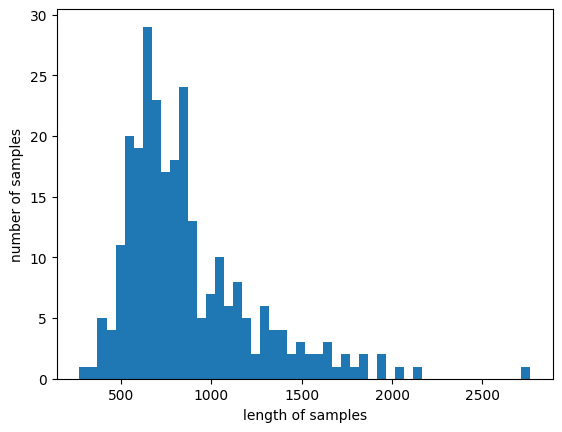

In [9]:
# EDA
# 뉴스 길이 분포 확인
print('뉴스의 최대 길이 :', max(len(review) for review in tokenized_data))
print('뉴스의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [15]:
model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = -1, sg = 0)

In [19]:
model.wv.vectors.shape, print(model.wv.most_similar("SK"))

[('지옥', 0.3102531135082245), ('난마돌', 0.3068138360977173), ('체육', 0.30116382241249084), ('솔로', 0.30031701922416687), ('전인수', 0.29824259877204895), ('어린이', 0.29528334736824036), ('각별', 0.2876223623752594), ('리포트', 0.28633901476860046), ('27', 0.28199198842048645), ('기리', 0.27869778871536255)]


((4658, 100), None)